#### Time Series Practice using non relevant data
Just some practice until the preliminary database is set up.
The data is North American emissions since 1949

In [28]:
import pandas as pd 
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

naem_df = pd.read_csv('NA_Emissions.csv')
naem_df.head()

,Unnamed: 0,"CO2 emissions, North America, Annual (million metric tonnes carbon dioxide)"
0,1949,2206.690829
1,1950,2382.046176
2,1951,2526.687327
3,1952,2473.373964
4,1953,2536.892888


In [9]:
naem_df=naem_df.rename(columns={"Unnamed: 0":"Year", "CO2 emissions, North America, Annual (million metric tonnes carbon dioxide)":"Emissions"})
naem_df.head()

,Year,Emissions
0,1949,2206.690829
1,1950,2382.046176
2,1951,2526.687327
3,1952,2473.373964
4,1953,2536.892888


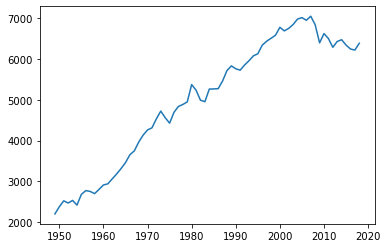

In [10]:
y= naem_df['Emissions']
X = naem_df['Year']
plt.plot(X,y)

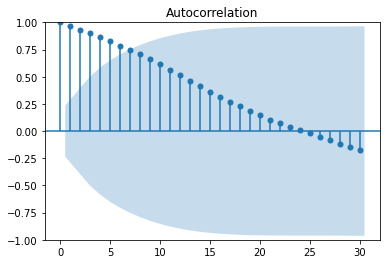

In [19]:
plot_acf(y, lags=30)
plt.show()
# this autocorrelation plot is used to help determine the amount of differencing (the d term in ARIMA) needed in the ARIMA model
# a positive autocorrelation at lag-1 shows that some amount of differencing is needed.
# the autocorrelation doesn't get close to zero until after lag-20 which suggests that a high amount of differencing is needed

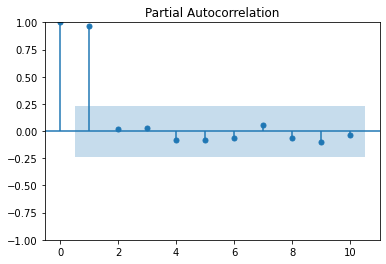

In [23]:
plot_pacf(y,lags=10, method='ywm')
plt.show()

# the partial autocorrelation graph is used to determine the value for the p order in the ARIMA model
# there is a sharp cutoff in the partial autocorrelation graph at lag-1. 
# when this is the case and there is a positive autocorrelation at lag-1 (which is shown in the previous graph)
# the value for p can be set to the number of the lag at which the partial autocorrelation cuts off. 1 in this case

In [31]:
#ARIMA
#Auto-Regressive Integreation Moving-Average

# three terms that I need to use for the ARIMA model
# p is the number of autoregressive terms (if the data is not stationary, has a trend or seasonality, we need this term to make it stationary)
#d is the number of nonseasonal differences needed to make it stationary
#q is the number of lagged forecast errors in the prediction equation.

# this data is not stationary (meaning it has a trend) so we need a value for d, i'll start with 2 and adjust from there
# as stated in the above cell i will use a p value of 1 at first

# the q term will be set to 0. This term should have a value if the data shows signs of being overdifferenced which can be determined by 
#the auto correlation graph. An overdifferenced dataset would have a negative lag-1 which this data does not have


                               SARIMAX Results                                
Dep. Variable:              Emissions   No. Observations:                   70
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -445.052
Date:                Fri, 08 Jul 2022   AIC                            896.104
Time:                        16:47:24   BIC                            902.806
Sample:                             0   HQIC                           898.763
                                 - 70                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2345      0.103      2.269      0.023       0.032       0.437
ar.L2         -0.1018      0.121     -0.845      0.398      -0.338       0.134
sigma2      2.354e+04   4189.911      5.619      0.0

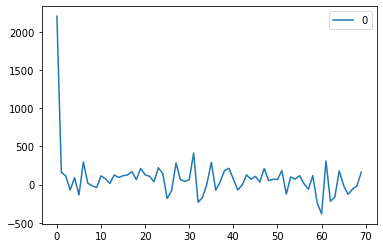

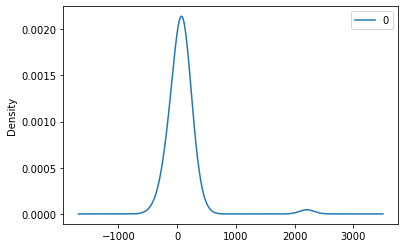

                 0
count    70.000000
mean     83.564798
std     294.835009
min    -383.910472
25%     -16.719605
50%      70.944494
75%     128.894474
max    2206.690829


In [39]:
#okay time to try the first attempt at modeling
model = ARIMA(y, order=(2,1,0))
model_fit = model.fit()
print(model_fit.summary())

#plot it
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

#error
residuals.plot(kind='kde')
plt.show()

print(residuals.describe())